# 日経平均株価予測

In [1]:
# ライブラリインポート
# 時刻取得、操作
import datetime

# データ操作
import pandas as pd

# 数値計算
import numpy as np

# グラフ描画
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf

# 株価取得
import yfinance as yf

# 予測モデル
# 自己回帰モデル(ARモデル)
from statsmodels.tsa.ar_model import AutoReg

# RMSE計算
from sklearn import metrics

# Pandasのオプション
pd.options.display.max_columns=100
pd.options.display.max_rows=50

# Jupyter Notebookを使用している人は以下を記述
%matplotlib inline

### データ取得

In [2]:
# 取得日付を指定
# start = datetime.datetime(1965, 1, 5)
# end = datetime.date.today()

In [3]:
# 株の銘柄コード、ティッカーシンボル設定
# 今回は日経平均株価（日経225）
stock_code = '^N225'

In [4]:
# 株価取得
# <変数> = yf.download(tickers=<銘柄コード>, start=<開始日>, end=<終了日>)
nikkei = yf.download(tickers=stock_code)#, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [5]:
# データ型の確認
# print(<変数> or <文字列>)
# 変数の中身や文字列を出力
# type(<変数>)
# 変数のデータ型を確認
print(type(nikkei))

<class 'pandas.core.frame.DataFrame'>


In [6]:
# <データフレーム>.dtypes
# データフレームの'dtypes'というメソッド（関数）を使用
# データフレーム内各列のデータ型を得る
print(nikkei.dtypes)

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [7]:
# データの確認
# headメソッド
# （）内の数値の行数をデータフレームの先頭から表示
nikkei.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1965-01-05,1257.719971,1257.719971,1257.719971,1257.719971,1257.719971,0
1965-01-06,1263.989990,1263.989990,1263.989990,1263.989990,1263.989990,0
1965-01-07,1274.270020,1274.270020,1274.270020,1274.270020,1274.270020,0
1965-01-08,1286.430054,1286.430054,1286.430054,1286.430054,1286.430054,0
1965-01-12,1288.540039,1288.540039,1288.540039,1288.540039,1288.540039,0
1965-01-13,1281.670044,1281.670044,1281.670044,1281.670044,1281.670044,0
1965-01-14,1289.500000,1289.500000,1289.500000,1289.500000,1289.500000,0
1965-01-18,1271.680054,1271.680054,1271.680054,1271.680054,1271.680054,0
1965-01-19,1270.339966,1270.339966,1270.339966,1270.339966,1270.339966,0


In [8]:
nikkei.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-13,38211.609375,38273.398438,37969.578125,38179.460938,38179.460938,128700000
2024-05-14,38287.988281,38477.679688,38084.710938,38356.058594,38356.058594,143300000
2024-05-15,38533.089844,38816.601562,38335.609375,38385.730469,38385.730469,146300000
2024-05-16,38645.960938,38949.378906,38513.328125,38920.261719,38920.261719,157900000
2024-05-17,38561.039062,38799.929688,38539.558594,38782.078125,38782.078125,0


In [9]:
# null値確認
nikkei.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

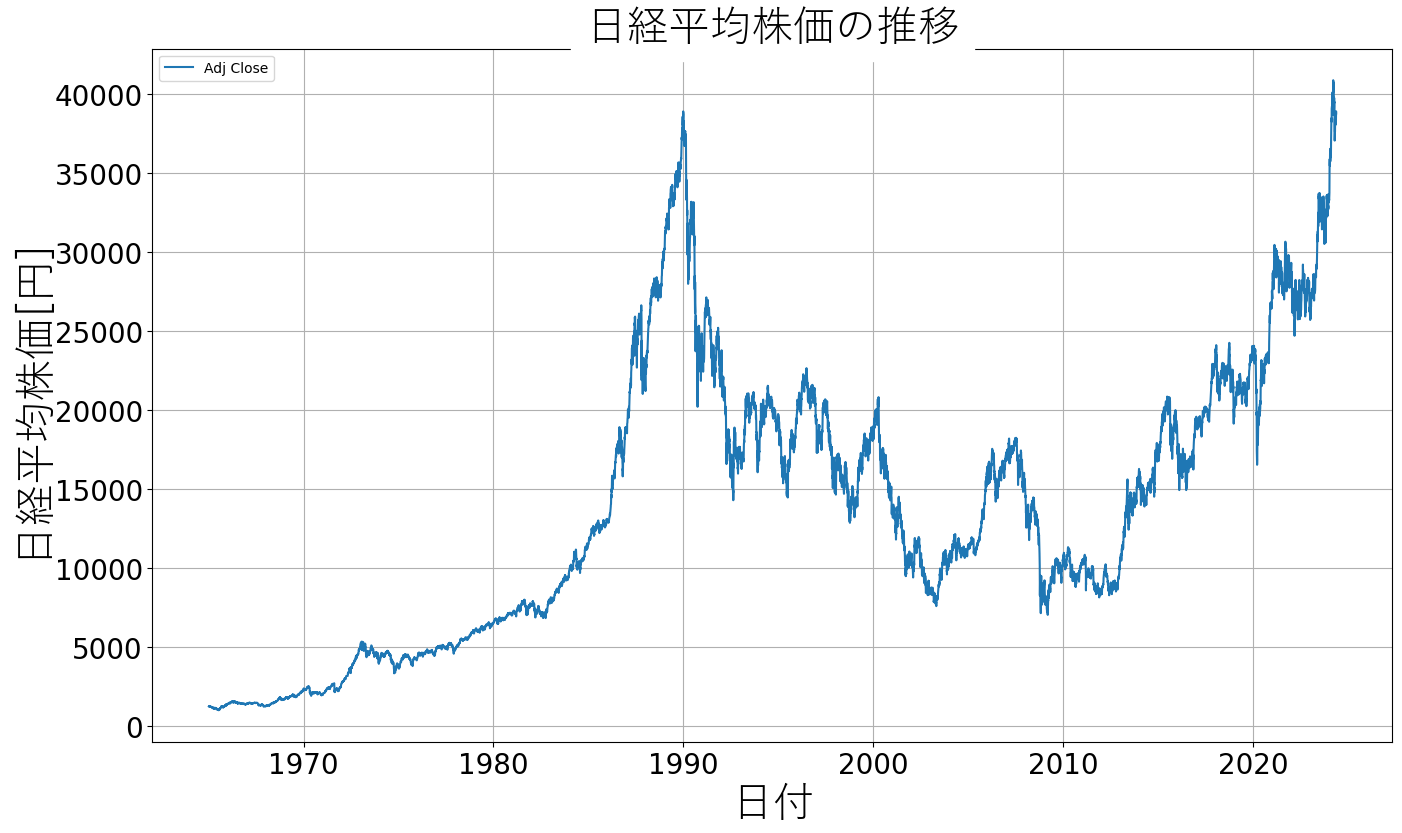

In [10]:
# plt.plot(nikkei.index, nikkei['Close'], label="Close")
plt.figure(figsize=(16, 9))
plt.plot(nikkei.index, nikkei['Adj Close'], label="Adj Close")

plt.title("日経平均株価の推移", color='black', backgroundcolor='white', size=30, loc='center', fontname='Yu Gothic')
plt.xlabel("日付", color='black', size=30, fontname='Yu Gothic')
plt.ylabel("日経平均株価[円]", color='black', size=30, fontname='Yu Gothic')
plt.xticks(size=20)
plt.yticks(size=20)

plt.legend()
plt.grid()
plt.show()
# plt.tight_layout()
# plt.savefig('hoge.png')

In [11]:
# 特徴量エンジニアリング
# 単純移動平均 Simple Moving Average (SMA)
# 終値の単純移動平均を計算
def simpleMovingAverage(df, spanlist):
    for span in spanlist:
        column_name = f"{span}SMA"
        df[column_name] = df['Close'].rolling(span, min_periods=1).mean()

In [12]:
spanlist = [20, 50, 200]
simpleMovingAverage(nikkei, spanlist)

In [13]:
nikkei.head()

,Open,High,Low,Close,Adj Close,Volume,20SMA,50SMA,200SMA
Date,,,,,,,,,
1965-01-05,1257.719971,1257.719971,1257.719971,1257.719971,1257.719971,0,1257.719971,1257.719971,1257.719971
1965-01-06,1263.989990,1263.989990,1263.989990,1263.989990,1263.989990,0,1260.854980,1260.854980,1260.854980
1965-01-07,1274.270020,1274.270020,1274.270020,1274.270020,1274.270020,0,1265.326660,1265.326660,1265.326660
1965-01-08,1286.430054,1286.430054,1286.430054,1286.430054,1286.430054,0,1270.602509,1270.602509,1270.602509
1965-01-12,1288.540039,1288.540039,1288.540039,1288.540039,1288.540039,0,1274.190015,1274.190015,1274.190015


In [14]:
# # plt.plot(nikkei.index, nikkei['Close'], label="Close")
# plt.figure(figsize=(16, 9))
# plt.plot(nikkei.index, nikkei['Adj Close'], label="終値")
# plt.plot(nikkei.index, nikkei['20SMA'], label="20日移動平均線")
# plt.plot(nikkei.index, nikkei['50SMA'], label="50日移動平均線")
# plt.plot(nikkei.index, nikkei['200SMA'], label="200日移動平均線")

# plt.title("日経平均株価の推移", color='black', backgroundcolor='white', size=30, loc='center', fontname='Yu Gothic')
# plt.xlabel("年月日", color='black', size=30, fontname='Yu Gothic')
# plt.ylabel("日経平均株価[円]", color='black', size=30, fontname='Yu Gothic')
# plt.xticks(size=20)
# plt.yticks(size=20)

# plt.legend(loc='best', prop={'family': 'Yu Gothic', 'size':15})
# plt.grid()
# plt.tight_layout()
# # plt.savefig('hoge.png')
# plt.show()

In [15]:
# plt.figure(figsize=(16, 9))
# plt.bar(nikkei.index, nikkei['Volume'], label="出来高")

# plt.legend(loc='best', prop={'family':'Yu Gothic', 'size':15})
# plt.show()

In [16]:
# # plt.figure(figsize=(16, 9))
# import matplotlib.patches as mpatches
# fig, axes = mpf.plot(nikkei, type='candle', style='yahoo', axtitle='N225', volume=True, mav=(20,50,200), figsize=(16,9), figratio=(16,9), datetime_format='%Y/%m/%d', warn_too_much_data=100000, returnfig=True)
# legend = ["20SMA", "50SMA", "200SMA"]
# # ma2_patch = mpatches.Patch(color='red', label='20SMA')
# # ma4_patch = mpatches.Patch(color='green', label='50SMA')
# # ma6_patch = mpatches.Patch(color='#405173', label='200SMA')
# # axes[0].legend(handles=[ma2_patch, ma4_patch, ma6_patch])
# # axes[0].legend(legend)

# fig.show()

In [17]:
cdf = nikkei.copy()#[datetime.datetime(2021,10,1):datetime.datetime(2022,2,28)]
apd = {"20SMA":mpf.make_addplot(cdf['20SMA'], color="blue"),        # 書籍(修正版)のコード
       "50SMA":mpf.make_addplot(cdf['50SMA'], color="green"),
       "200SMA":mpf.make_addplot(cdf['200SMA'], color="red")
    }

In [18]:
# fig, axes = mpf.plot(cdf,
#                      type='candle',
#                      style='yahoo',
#                      axtitle='N225',
#                      volume=True,
#                     #  mav=(20,50,200),
#                      addplot=list(apd.values()),
#                      figsize=(16,9),
#                      figratio=(16,9),
#                      datetime_format='%Y/%m/%d',
#                      warn_too_much_data=100000,
#                      returnfig=True
#                      )

# axes[0].legend([None]*(len(apd)+2))
# handles = axes[0].get_legend().legendHandles
# axes[0].legend(handles=handles[2:], labels=list(apd.keys()))

# plt.show()

### データ前処理

いったん2023念までを学習して2024年を予測させる

In [21]:
# 訓練データとテストデータを準備
# 5営業日を予測
len_test = 5
# 現在が平日か休日か？15:00以前以降か判定
train_df =nikkei[:-1]
# train_df = nikkei[:len(nikkei) - len_test]
# test_df = nikkei[len(nikkei) - len_test:]
# cutoff_date = pd.Timestamp('2023-12-31')
# train_df = nikkei[nikkei.index <= cutoff_date]
# test_df = nikkei[nikkei.index > cutoff_date]

In [22]:
train_df

,Open,High,Low,Close,Adj Close,Volume,20SMA,50SMA,200SMA
Date,,,,,,,,,
1965-01-05,1257.719971,1257.719971,1257.719971,1257.719971,1257.719971,0,1257.719971,1257.719971,1257.719971
1965-01-06,1263.989990,1263.989990,1263.989990,1263.989990,1263.989990,0,1260.854980,1260.854980,1260.854980
1965-01-07,1274.270020,1274.270020,1274.270020,1274.270020,1274.270020,0,1265.326660,1265.326660,1265.326660
1965-01-08,1286.430054,1286.430054,1286.430054,1286.430054,1286.430054,0,1270.602509,1270.602509,1270.602509
1965-01-12,1288.540039,1288.540039,1288.540039,1288.540039,1288.540039,0,1274.190015,1274.190015,1274.190015
...,...,...,...,...,...,...,...,...,...
2024-05-10,38361.789062,38741.878906,38126.910156,38229.109375,38229.109375,167300000,38331.613672,39162.217656,34836.661309
2024-05-13,38211.609375,38273.398438,37969.578125,38179.460938,38179.460938,128700000,38261.496289,39141.016484,34865.602314
2024-05-14,38287.988281,38477.679688,38084.710938,38356.058594,38356.058594,143300000,38207.167773,39123.977031,34894.913154


In [21]:
# test_df

,Open,High,Low,Close,Adj Close,Volume,20SMA,50SMA,200SMA
Date,,,,,,,,,
2024-05-13,38211.609375,38273.398438,37969.578125,38179.460938,38179.460938,128700000,38261.496289,39141.016484,34865.602314
2024-05-14,38287.988281,38477.679688,38084.710938,38356.058594,38356.058594,143300000,38207.167773,39123.977031,34894.913154
2024-05-15,38533.089844,38816.601562,38335.609375,38385.730469,38385.730469,146300000,38150.276758,39108.367813,34922.361650
2024-05-16,38645.960938,38949.378906,38513.328125,38920.261719,38920.261719,157900000,38134.649805,39088.556641,34954.510361
2024-05-17,38561.039062,38799.929688,38539.558594,38772.671875,38772.671875,0,38149.723437,39061.825469,34986.852471


### モデル構築

In [22]:
# test_df.index

DatetimeIndex(['2024-05-13', '2024-05-14', '2024-05-15', '2024-05-16',
               '2024-05-17'],
              dtype='datetime64[ns]', name='Date', freq=None)

c:\Users\Public\Anaconda\envs\kaggle\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Public\Anaconda\envs\kaggle\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Public\Anaconda\envs\kaggle\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Public\Anaconda\envs\kaggle\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit incre

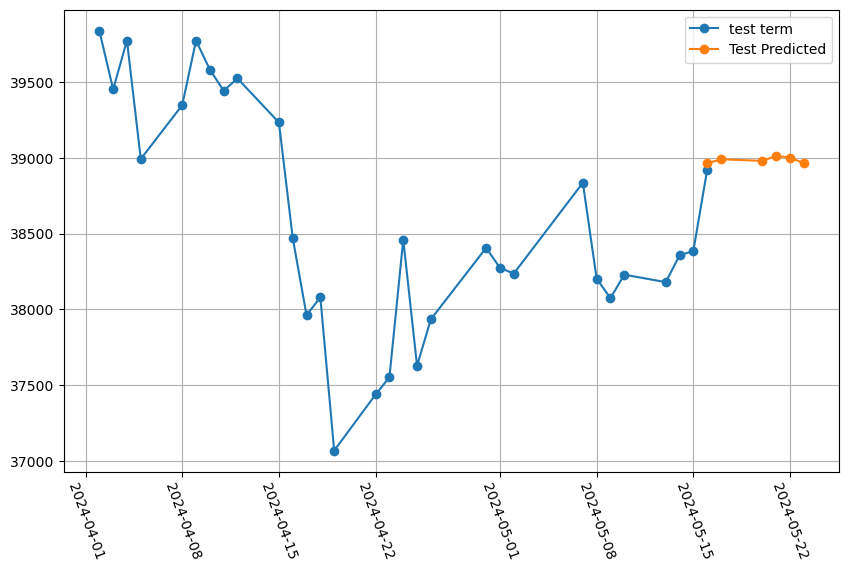

In [29]:
fig = plt.figure(figsize=(10, 6), dpi=100)

min_lag = 30

ar_model = AutoReg(train_df['Close'], lags=min_lag).fit()#, exog=train_df.drop(columns=['Close', 'Adj Close'])).fit()
# forecast = ar_model.forecast(len_test*2)#, exog=test_df.drop(columns=['Close', 'Adj Close']))

train_predict = ar_model.predict(start=len(train_df) - (len_test*6) + 1, end=len(train_df))
test_predict = ar_model.predict(start=len(train_df), end=len(train_df) + len_test)
# print(test_predict)

date_index = ['2024-5-16', '2024-5-17', '2024-5-20', '2024-5-21', '2024-5-22', '2024-5-23']

train_predict_df = pd.DataFrame({'Date'       :train_df.tail(len_test*6).index,
                                 'train_predicted'  :train_predict}).set_index('Date')

# test_predict_df = pd.DataFrame({'Date'          :test_df.head(len_test).index,
#                                 'test_predicted':test_predict}).set_index('Date')
test_predict_df = pd.DataFrame({'Date'          :date_index,
                                'test_predicted':test_predict})
test_predict_df['Date'] = pd.to_datetime(test_predict_df['Date'])

test_predict_df = test_predict_df.set_index('Date')

predict_df = pd.concat([train_predict_df, test_predict_df])

# start_date = '2024-4-22'
# plt.plot(nikkei[nikkei.index > start_date].index, nikkei['Close'][nikkei.index > start_date], color='tab:blue', label="Actual Data")
plt.plot(train_df.tail(len_test*6).index, train_df.tail(len_test*6)['Close'], marker="o", color='tab:blue', label="test term")
# plt.plot(predict_df.index, predict_df['train_predicted'], ls="--", color='tab:orange', label="Train Predicted")
plt.plot(predict_df.index, predict_df['test_predicted'], ls="-", marker="o", color='tab:orange', label="Test Predicted")

# ax.plot(nikkei['Close'][nikkei.index > '2024-4-1'], color='tab:blue', label="actual data")
# plt.plot(test_df.index, test_df['Close'], color='tab:green', label="Test Term")
# ax.plot(forecast_df.index, forecast_df['Predicted'], ls="--", color='tab:red', label="predicted")
plt.xticks(rotation=-70)
plt.legend(loc='best')
plt.grid()
plt.show()



In [24]:
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                14593
Model:                    AutoReg(30)   Log Likelihood              -98233.754
Method:               Conditional MLE   S.D. of innovations            205.716
Date:                Fri, 17 May 2024   AIC                         196531.509
Time:                        11:42:35   BIC                         196774.268
Sample:                            30   HQIC                        196612.170
                                14593                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6078      3.191      1.131      0.258      -2.647       9.863
Close.L1       0.9954      0.008    120.123      0.000       0.979       1.012
Close.L2      -0.0238      0.012     -2.033      0.0

In [25]:
train_rmse = metrics.mean_squared_error(train_df['Close'].tail(10), train_predict, squared=False)
test_rmse = metrics.mean_squared_error(test_df['Close'], test_predict, squared=False)

train_rmspe = np.sqrt(np.mean(((train_predict - np.array(train_df['Close'].tail(10))) / np.array(train_df['Close'].tail(10)))**2))*100
test_rmspe = np.sqrt(np.mean(((test_predict - np.array(test_df['Close'])) / np.array(test_df['Close']))**2))*100

print("平均平方二乗誤差")
print("訓練データ:", round(train_rmse,1), "円")#, round(train_rmspe, 1),"%")
print("テストデータ:", round(test_rmse, 1), "円")#,round(test_rmspe, 1),"%")

平均平方二乗誤差
訓練データ: 31.2 円
テストデータ: 358.2 円


In [26]:
print(len(train_df))

14593
